# Metadata import

In [23]:
# column_names, column_range
%run marketing-info.py

column_names

{1: 'ANNUAL INCOME OF HOUSEHOLD (PERSONAL INCOME IF SINGLE)',
 2: 'SEX',
 3: 'MARITAL STATUS',
 4: 'AGE',
 5: 'EDUCATION',
 6: 'OCCUPATION',
 7: 'HOW LONG HAVE YOU LIVED IN THE SAN FRAN./OAKLAND/SAN JOSE AREA?',
 8: 'DUAL INCOMES (IF MARRIED)',
 9: 'PERSONS IN YOUR HOUSEHOLD',
 10: 'PERSONS IN HOUSEHOLD UNDER 18',
 11: 'HOUSEHOLDER STATUS',
 12: 'TYPE OF HOME',
 13: 'ETHNIC CLASSIFICATION',
 14: 'WHAT LANGUAGE IS SPOKEN MOST OFTEN IN YOUR HOME?'}

In [24]:
column_ranges[1]

{1: 'Less than $10,000',
 2: '$10,000 to $14,999',
 3: '$15,000 to $19,999',
 4: '$20,000 to $24,999',
 5: '$25,000 to $29,999',
 6: '$30,000 to $39,999',
 7: '$40,000 to $49,999',
 8: '$50,000 to $74,999',
 9: '$75,000 or more'}

# Dataset import and basic analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('../dataset/marketing-data.tsv', sep=' ')
dataset_wout_nans = dataset.dropna().astype(int)

dataset

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,9,2,1.0,5,4.0,5.0,5.0,3,3.0,0,1.0,1.0,7.0,NaN
1,9,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.0
2,9,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.0
3,1,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.0
4,1,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988,1,2,5.0,1,1.0,2.0,5.0,1,3.0,2,3.0,1.0,7.0,1.0
8989,2,1,5.0,2,4.0,1.0,5.0,1,4.0,0,3.0,1.0,7.0,1.0
8990,1,2,5.0,1,2.0,1.0,5.0,1,3.0,2,3.0,1.0,7.0,1.0
8991,4,1,1.0,6,4.0,3.0,5.0,2,3.0,1,2.0,3.0,7.0,1.0


In [25]:
# classic procedure: check NaN counts

def get_nan_counts(df):
    nan_counts = df.rename({str(k): f'{k} | {v}' for k, v in column_names.items()}, axis=1)
    nan_counts = nan_counts.isna().sum()
    nan_counts = pd.concat([nan_counts, nan_counts / len(df) * 100], axis=1)
    nan_counts.columns = ['Count', 'Percentage']
    return nan_counts

get_nan_counts(dataset)

,Count,Percentage
1 | ANNUAL INCOME OF HOUSEHOLD (PERSONAL INCOME IF SINGLE),0,0.000000
2 | SEX,0,0.000000
3 | MARITAL STATUS,160,1.779162
4 | AGE,0,0.000000
5 | EDUCATION,86,0.956299
6 | OCCUPATION,136,1.512287
7 | HOW LONG HAVE YOU LIVED IN THE SAN FRAN./OAKLAND/SAN JOSE AREA?,913,10.152341
8 | DUAL INCOMES (IF MARRIED),0,0.000000
9 | PERSONS IN YOUR HOUSEHOLD,375,4.169910
10 | PERSONS IN HOUSEHOLD UNDER 18,0,0.000000


In [48]:
# for each column with non-zero NaN count
# check if there are any NaNs in other columns
# > temp

# If there are none, then it is possible
# to predict them easily

nan_counts = nan_counts.isna().sum()
for col in nan_counts[nan_counts != 0].index:
    temp = dataset[dataset[col].isna()].isna().sum()
    # print(f'Columns {col}:\n{temp}\n')
    if (temp.drop(col) == 0).all():
        print(col)

# reasoning result:
#   fail, proceed to the next step

In [7]:
# select upper triangle of correlation matrix
# > [ref-1](https://stackoverflow.com/questions/34417685/melt-the-upper-triangular-matrix-of-a-pandas-dataframe)
# make pairs and filter
# corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# corr_matrix.iloc[0].sort_values(ascending=False)

corr = (dataset
    .corr()
    .abs()
    .unstack()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'level_0': 'F1', 'level_1': 'F2', 0: 'Correlation'})
    .query('Correlation != 1')
)

corr[corr['F1'] == '1']

,F1,F2,Correlation
22,1,11,0.518421
27,1,3,0.482685
31,1,5,0.461601
37,1,4,0.391473
38,1,8,0.367962
40,1,6,0.361461
67,1,12,0.209666
101,1,13,0.109450
104,1,14,0.104551
106,1,7,0.097300


In [8]:
corr[corr['Correlation'] > 0.5]

,F1,F2,Correlation
14,3,8,0.796418
15,8,3,0.796418
16,10,9,0.701617
17,9,10,0.701617
18,4,11,0.636222
19,11,4,0.636222
20,3,11,0.586676
21,11,3,0.586676
22,1,11,0.518421
23,11,1,0.518421


In [42]:
corr['set'] = corr.apply(lambda x: set([x['F1'], x['F2']]), axis=1).astype(str)
corr_unique = corr.drop_duplicates('set').drop(columns='set')

for i, j, val in corr_unique[corr_unique['Correlation'] > 0.5].to_numpy():
    print(f'Correlation: {val}')
    print(f'{i} {column_names[int(i)]} => {column_ranges[int(i)]}')
    print(f'{j} {column_names[int(j)]} => {column_ranges[int(j)]}')
    print(dataset[[i, j]].value_counts().head(10))
    print('\n\n')

# reasoning result:
#   I have noticed that some answers
#   could refer to different characteristics
#   
#   Marital Status <-> Dual Incomes:
#   2: "Living together, not married" could refer to
#   any -- "Not Married", "Yes" and "No"
#   That means "Not Married" is better to be replaced by "No"
#   as there are no differences between them
#
#   Persons in HH <-> Persons in HH under 18:
#   Second column cannot be greater and means error.
#   Should be replaced either with median or predicted
#
#   HH status <-> { Age, Marital Status, Annual Income }:
#   Good correlation metrics (not many options)

Correlation: 0.7964181279203656
3 MARITAL STATUS => {1: 'Married', 2: 'Living together, not married', 3: 'Divorced or separated', 4: 'Widowed', 5: 'Single, never married'}
8 DUAL INCOMES (IF MARRIED) => {1: 'Not Married', 2: 'Yes', 3: 'No'}
3    8
5.0  1    3654
1.0  2    2022
     3    1219
3.0  1     875
2.0  1     441
4.0  1     302
2.0  2     147
1.0  1      93
2.0  3      80
dtype: int64



Correlation: 0.7016174305618721
10 PERSONS IN HOUSEHOLD UNDER 18 => {0: 'None', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', 6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine or more'}
9 PERSONS IN YOUR HOUSEHOLD => {1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', 6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine or more'}
10  9  
0   2.0    2439
    1.0    1585
1   3.0     781
0   3.0     738
2   4.0     708
0   4.0     400
1   4.0     355
3   5.0     266
1   2.0     188
2   5.0     175
dtype: int64



Correlation: 0.6362219158937481
4 AGE => {1: '14 thru 17', 2: '18 thru 24', 3: '25 thru 34'

**Total reasoning result**

It is possible to interpolate some columns.

There are several options:

1. use only clean dataset (wout NaNs)
   ```python
   dataset = dataset.dropna()
   ```
2. set average / most relevant categorical value

   could be median on whole dataset or groups of other columns
3. mask values before feeding it to the model (new categorical value)
   ```python
   dataset = dataset.fillna(11)
   ```
4. predict values for each column from columns that does not contain NaNs
   ```python
   nan_counts = dataset.isna().sum()
   for col in nan_counts[nan_counts != 0].index:
       temp = dataset[dataset[col].isna()].isna().sum()
       print(f'Column {col} ({temp[col]}):')
       print(f'{temp[temp != 0].drop(col).sort_values(ascending=False)}\n')
   ```


**I will go with 2nd option as data here is not complicated much. However it could take a lot of time filling out all values.**

# Handling missing values

Get rid of incorrect values, downsample, reorder (for decision trees):

- **Incorrect:** `[9:10]`
- **Downsample:** `[8, 12(?), 14(?)]`
- **Reorder:** In order to define this, we need to plot distributions

*Notes:*
- (3, 9, 10).sum - ?
- sort by median
- train on clusters

In [1]:
%run util.py

# vars:
#   column_names, column_names_rename
#
# functions:
#   def prepare_plot(size_x, size_y)
#   def prepare_plots(size_x, size_y, grid_x, grid_y)
#   def violin_plot(data, col1, col2, return_fig=False, sns_inner='point', sns_scale='count', sns_sex='both-split')
#   def violin_plot_widget(data)
#   def get_nan_counts(df)
#   def get_correlations(df, drop_duplicates=True)
#   def reorder_around_feature(df, label='1', skip_features=['2'])
#   def catboost_fill(df, features, label, depth_select='auto')

In [2]:
dataset = pd.read_csv('../dataset/marketing-data.tsv', sep=' ')#.rename(column_names_rename, axis=1)
dataset_wout_nans = dataset.dropna().astype(int)
dataset_masked = dataset.fillna(11).astype(int)

In [3]:
df = dataset.copy()
get_nan_counts(df)

,Count,Percentage
1 | income,0,0.000000
2 | sex,0,0.000000
3 | marital status,160,1.779162
4 | age,0,0.000000
5 | education,86,0.956299
6 | occupation,136,1.512287
7 | years in bay area,913,10.152341
8 | dual incomes,0,0.000000
9 | num persons hh,375,4.169910
10 | num children hh,0,0.000000


## Reorder (?)

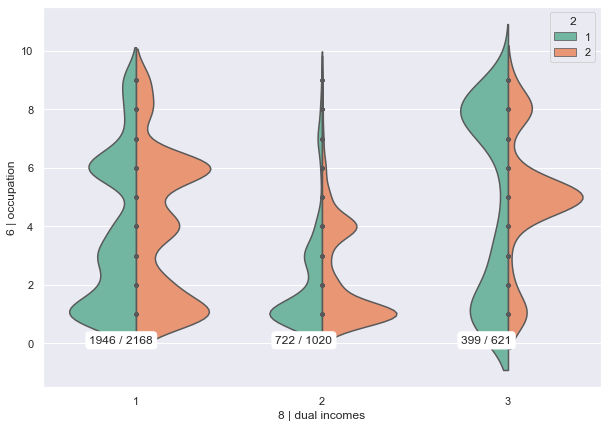

In [71]:
# why? because using median-fill method
# we could encounter some problems with good metrics
violin_plot(dataset_wout_nans, '8', '6')

The main idea is make some categorical features ordinal.  
In order to do so we need to sort categorical features.

For example:

1. Professional/Managerial
2. Sales Worker
3. Factory Worker/Laborer/Driver
4. Clerical/Service Worker
5. Homemaker
6. Student, HS or College
7. Military
8. Retired
9. Unemployed

Becomes:

1. Unemployed
2. Homemaker
3. Retired
4. Student, HS or College
5. Sales Worker
6. Factory Worker/Laborer/Driver
7. Clerical/Service Worker
8. Military
9. Professional/Managerial

In order to see that we need to see dependency with income.

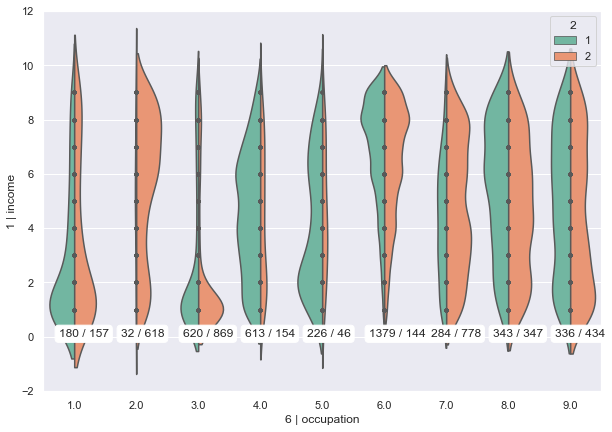

In [4]:
# quick reorder test
data = dataset_wout_nans

reordered = {}
for col in data.columns.drop(['1', '2']):
    result = (data
        .groupby(col)
        .median()['1']
        .sort_values()
        .index
        # .to_series()
        # .map(column_ranges[int(col)])
        .tolist()
    )
    # if col == '6':
        # result = [6, 9, 2, 7, 4, 3, 5, 8, 1]
        # result = [6, 9, 7, 4, 2, 3, 5, 8, 1]
    reordered[col] = dict(zip(np.unique(result), result))

# reordered['6'].values()
violin_plot(df.replace(reordered), '6', '1')
# violin_plot_widget(df.replace(reordered))

In [5]:
data = dataset_wout_nans
violin_plot_widget(dataset_wout_nans)

# reasoning result:
#   (3, 1) => { 3=1 -> 1=high | 3=4 -> 1=low(female) }
#   (4, 1) => { 4=1 -> 1=low | 4=4 -> 1=avg+ | 4={5, 6} -> 1=high }
#   (5, 1) => { 5={1, 2} -> 1=lowest | 5={5, 6} -> 1=avg+ }
#   (8, 1) => { 8={2, 3} -> 1=avg+ }
#   (10, 1) => { 10={1, 2} -> 1={lowest, highest} | 10=3+ -> 1=avg- }
#   (11, 1) => { 11=1 -> 1=high | 11=3 -> 1=low }
#   (14, 1) => { 14=2 == 14=3 }


# (3, 1)
# if {married} then it is likely income is high
# if {widowed} then it is likey income is low
# violin_plot(data, '3', '1')

# (4, 1)
# if {1} then it is likely income is lowest
# if {4} then it is likely income is more than avg
# if {5, 6} then it is likely income is high
# violin_plot(data, '4', '1')

# (5, 1)
# if {1, 2} then it is likely income is lowest
# if {5, 6} then it is likely income is more than avg
# violin_plot(data, '5', '1')

# (8, 1)
# most married people earn more
# (does it mean that we should not combine 1 and 3?)
# violin_plot(data, '8', '1')

# (10, 1)
# for {1, 2} kids either you earn a lot or not
# for 3+ kids most persons earn less than average
# violin_plot(data, '10', '1')

# (11, 1)
# if you own a house you definetely have a good income
# opposite behaviour for persons who live with family
# violin_plot(data, '11', '1')

# (14, 1)
# we can combine Spanish and Other
# as they look similar
# violin_plot(data, '14', '1')

interactive(children=(Dropdown(description='col1', options=('1', '2', '3', '4', '5', '6', '7', '8', '9', '10',…

## Correct and fill NaNs

Using previous reasoning result:

`Marital Status` <-> `Dual Incomes`:  
2: `Living together, not married` could refer to  
any -- `Not Married`, `Yes` and `No`  
That means `Not Married` is better to be replaced by `No`  
as there are no differences between them  

`Persons in HH` <-> `Persons in HH under 18`:  
Second column cannot be greater and means error.  
Should be replaced either with median or predicted  

`HH status` <-> `{ Age, Marital Status, Annual Income }`:  
Good correlation metrics (not many options)

In [1]:
%run util.py
df = pd.read_csv('../dataset/marketing-data.tsv', sep=' ')#.rename(column_names_rename, axis=1)
df_wout_nans = df.dropna().astype(int)
df_masked = df.fillna(11).astype(int)

In [2]:
get_nan_counts(df)

,Count,Percentage
1 | income,0,0.000000
2 | sex,0,0.000000
3 | marital status,160,1.779162
4 | age,0,0.000000
5 | education,86,0.956299
6 | occupation,136,1.512287
7 | years in bay area,913,10.152341
8 | dual incomes,0,0.000000
9 | num persons hh,375,4.169910
10 | num children hh,0,0.000000


## Association rule 1 from book

In [3]:
# fill NaNs in 14th column
# df[(df['9'] == 1) & (df['10'] == 0)].describe(percentiles=[.75, .9, .95, .99])['14']
df['14'][(df['14'].isnull()) & (df['9'] == 1) & (df['10'] == 0)] = 1.0

<ipython-input-3-764ac0d732ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['14'][(df['14'].isnull()) & (df['9'] == 1) & (df['10'] == 0)] = 1.0


## Handling specific scenarios first

In [4]:
cases = {}

# married people
# at age of 14-17
cases[1] = df[(df['3'] == 1) & (df['4'] == 1)]

# any other martial status besides 5. Single
# at age of 14-17
cases[2] = df[(df['3'] != 5) & (df['3'].notnull()) & (df['4'] == 1)]

# married people
# not married in '8 dual incomes'
cases[3] = df[(df['3'] == 1) & (df['8'] == 1)]
# hard to determine if that was a mistake in '3' or '8'

# never married people
# have dual income
cases[4] = df[(df['3'] == 5) & (df['8'] != 1) & (df['8'].notnull())]

# cases when there are more persons under 18 in house
# than total persons in house
cases[5] = df[df['10'] > df['9']]
cases[6] = df[(df['10'] >= df['9']) & (df['4'] >= 3)]
# cases[6][['9', '10']]
# solution 1: replace '10' with NaN for replacement
# solution 2: just drop them

# one person in house
# one person below 18 in house
# this person 18+ 
cases[7] = df[(df['9'] == 1) & (df['10'] == 1) & (df['4'] >= 3)]
# hard to determine if that was a mistake in '10' or '4'

# '3 marital status not defined'
# '8 dual incomes' is not 'not married 
cases[8] = df[(df['3'].isnull()) & (df['8'] != 1.0)]

[len(case) for case in cases.values()]

[10, 30, 93, 0, 18, 53, 20, 87]

In [5]:
# handle cases 5 (drop), 6 (mask)
df = df.drop(df[(df['9'] <= df['10']) & (df['4'] >= 3)].index)
df['10'] = df['10'].mask(df['9'] < df['10'])

In [6]:
# handling case 8
# violin_plot(df, '8', '3', sns_sex='both-split', sns_scale='area')
df['3'] = df.apply(
    lambda row: 1.0 if np.isnan(row['3']) and (row['8'] != 1.0) else row['3'],
    axis=1
)

## Replacing / predicting missing values

In [7]:
%%capture
# fill "years in bay area" with median as it is impossible to predict
# df['7'] = df['7'].fillna(df['7'].median())
# or predict with catboost
acc = {}
df, acc['7'] = catboost_fill(df, None, '7')

In [8]:
acc['7']

"Accuracy: 0.660904255319149 with depth 5 for features ['12', '4', '1', '11', '3']"

In [9]:
get_nan_counts(df)

,Count,Percentage
1 | income,0,0.000000
2 | sex,0,0.000000
3 | marital status,73,0.816555
4 | age,0,0.000000
5 | education,85,0.950783
6 | occupation,134,1.498881
7 | years in bay area,86,0.961969
8 | dual incomes,0,0.000000
9 | num persons hh,375,4.194631
10 | num children hh,9,0.100671


In [10]:
%%capture
# fill marital status
# violin_plot(df, '4', '3', sns_sex='both-split', sns_scale='area')
# df['3'] = df.groupby('4')['3'].apply(lambda x: x.fillna(int(x.median())))
# or predict with catboost
df, acc['3'] = catboost_fill(df, ['2', '4', '5', '8'], '3')

In [11]:
acc['3']

"Accuracy: 0.8304696449026346 with depth 4 for features ['2', '4', '5', '8']"

In [12]:
get_nan_counts(df)

,Count,Percentage
1 | income,0,0.000000
2 | sex,0,0.000000
3 | marital status,0,0.000000
4 | age,0,0.000000
5 | education,85,0.950783
6 | occupation,134,1.498881
7 | years in bay area,86,0.961969
8 | dual incomes,0,0.000000
9 | num persons hh,375,4.194631
10 | num children hh,9,0.100671


In [13]:
%%capture

# df, acc['14-1'] = catboost_fill(df, ['1', '5', '13'], '14')
df, acc['14-2'] = catboost_fill(df, None, '14')
# df, acc['14-3] = catboost_fill(df, ['1', '13'], '14')

# df, acc['12-1'] = catboost_fill(df, ['1', '4', '5', '6', '9'], '12')
# df, acc['12-2'] = catboost_fill(df, ['1', '4', '5', '6', '7', '8', '9', '10'], '12')
# df, acc['12-3'] = catboost_fill(df, None, '12')

In [14]:
acc['14-2']

"Accuracy: 0.9216757741347905 with depth 5 for features ['13', '9', '5', '11', '10']"

In [15]:
get_nan_counts(df)

,Count,Percentage
1 | income,0,0.000000
2 | sex,0,0.000000
3 | marital status,0,0.000000
4 | age,0,0.000000
5 | education,85,0.950783
6 | occupation,134,1.498881
7 | years in bay area,86,0.961969
8 | dual incomes,0,0.000000
9 | num persons hh,375,4.194631
10 | num children hh,9,0.100671


In [16]:
# corr = get_correlations(df, drop_duplicates=False)
# features = corr[corr['F1'] == '9'].head(11)['F2'].tolist()

test, reordered, reordered_back = reorder_around_feature(df)
catboost_fill(test, ['4', '10', '13'], '9')
# catboost_fill(test, None, '9')

/Volumes/P2_NTFS/Projects/true-engineering-ml-task/src/util.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[label][df_clean[label].isnull()] = y_pred
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/Volumes/P2_NTFS/Projects/true-engineering-ml-task/src/util.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

(      1  2    3  4    5    6    7  8    9   10   11   12   13   14
 0     9  2  5.0  4  4.0  4.0  5.0  2  9.0  7.0  3.0  5.0  8.0  2.0
 1     9  1  5.0  4  5.0  4.0  5.0  2  6.0  6.0  3.0  5.0  8.0  2.0
 2     9  2  5.0  7  5.0  6.0  5.0  3  9.0  8.0  2.0  4.0  8.0  2.0
 3     1  2  1.0  1  2.0  7.0  5.0  1  1.0  6.0  1.0  5.0  8.0  2.0
 4     1  2  1.0  1  2.0  7.0  3.0  1  1.0  6.0  1.0  5.0  8.0  2.0
 ...  .. ..  ... ..  ...  ...  ... ..  ...  ...  ...  ...  ...  ...
 6432  6  1  1.0  2  3.0  2.0  5.0  1  7.0  7.0  1.0  NaN  NaN  3.0
 6534  2  1  2.0  6  4.0  5.0  5.0  1  NaN  7.0  NaN  1.0  NaN  2.0
 7162  9  1  5.0  3  3.0  6.0  5.0  1  NaN  7.0  NaN  NaN  NaN  NaN
 8850  1  1  1.0  1  2.0  7.0  4.0  1  NaN  7.0  1.0  NaN  NaN  2.0
 3566  4  2  1.0  1  NaN  4.0  5.0  1  6.0  NaN  2.0  2.0  2.0  3.0
 
 [8940 rows x 14 columns],
 "Accuracy: 0.5078125 with depth 3 for features ['4', '10', '13']")

In [33]:
# violin_plot(df[df['3'] == 1], '8', '6')
# df[(df['3'] == 1) & (df['8'] == 1)]
# df['8'] = df['8'].mask((df['3'] == 1) & (df['8'] == 1))

# print(df['8'].isna().sum())
# df[df['3'] == 1].groupby(['2', '4', '5'])['8'].median()#.apply(lambda x: x.fillna(int(x.median())))

# df['3'] = df.groupby(['2', '4', '8'])['3'].apply(lambda x: x.fillna(int(x.median())))

In [34]:
# violin_plot(df, '13', '14')
# VVV working VVV
# df['14'] = df.apply(
#     lambda row: 1.0 if np.isnan(row['14']) and ~np.isnan(row['13']) and (int(row['13']) in [1, 3, 6, 7, 8]) else row['14'],
#     axis=1
# )

# df[df['14'].isna()].isna().sum()
# df.isna().sum()

# --------------------------------

# df[df['12'].isna()]
# df.groupby(['1', '4', '11'])['12'].median()
# df.groupby('11')['12'].median()
# violin_plot(df, '11', '4')

In [449]:
# violin_plot(df, '10', '9', sns_sex='both-combo', sns_scale='area')

# check if median-fill is good enough
# take good entries
# group by distinctive features
# take median for those groups to fillna

# violin_plot(df[df['9'] >= 3], '3', '10', sns_sex='both-combo', sns_scale='width')
# violin_plot(df[df['9'] >= 3], '13', '10', sns_sex='both-combo', sns_scale='width')
test = df[df['9'] > df['10']].groupby(['9', '3']).median()['10'].astype(int)
# test = df[df['9'] > df['10']].groupby(['9', '13', '3']).median()['10'].astype(int)
np.unique(test, return_counts=True)

test = df.copy()
test.mask(test['9'] < test['10'], inplace=True)
test['10'] = test.groupby(['9', '3'])['10'].apply(lambda x: x.fillna(int(x.median())))
test[test['10'].isna()].isna().sum()

1      18
2      18
3      18
4      18
5      26
6      30
7      90
8      18
9     393
10    393
11     88
12     87
13     31
14     56
dtype: int64

## Models

In [2]:
# column_names, column_range
%run marketing-info.py

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def get_accuracy_count(datasets_dict):
        results = {}
        results['total'] = len(datasets_dict['y']['test'])
        results['predicted'] = (datasets_dict['y']['test'] == datasets_dict['y']['pred']).sum()
        results['accuracy'] = round(results['predicted'] / results['total'] * 100, 2)
        return results

def prepare_datasets(dataset, target_column,
    dropna=False, categorize=True, columns_to_drop=0):
    if dropna:
        df = dataset.dropna().astype(int).astype(str)
    else:
        df = dataset.fillna(11).astype(int).astype(str)
    
    if categorize:
        df = df.astype({'1': float, '4': float, '5': float, '7': float, '9': float, '10': float})
    
    if columns_to_drop is not list:
        columns_to_drop = [target_column] + (df
            .astype(float)
            .corr()
            .abs()
            .loc[target_column]
            .drop(target_column)
            .sort_values()
            .head(columns_to_drop)
            .index.tolist()
        )

    data = df.drop(columns=columns_to_drop).to_numpy()
    label = df[target_column].to_numpy()

    datasets = { 'X': {}, 'y': {} }
    (
        datasets['X']['train'],
        datasets['X']['test'],
        datasets['y']['train'],
        datasets['y']['test']
    ) = train_test_split(data, label, test_size=0.1, random_state=42)

    return datasets

In [23]:
df, reorder, reorder_back = reorder_around_feature(df.dropna())

# df = pd.read_csv('../dataset/marketing-data.tsv', sep=' ')
datasets = prepare_datasets(df, '1', dropna=False, categorize=True, columns_to_drop=0)

### Quick model comparison

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

iterations = 1000
max_depth = 4

models = {}

models['logreg'] = LogisticRegression(
    max_iter=iterations,
    multi_class='multinomial',
    n_jobs=6,
)
models['svm'] = svm.SVC(decision_function_shape='ovo')
models['catboost'] = CatBoostClassifier(
    iterations=iterations,
    depth=max_depth,
    loss_function='MultiClass',
    early_stopping_rounds=100,
    verbose=False
)
models['xgboost'] = XGBClassifier(
    objective='multi:softprob',
    n_estimators=iterations,
    max_depth=max_depth,
    # learning_rate=learning_rate,
    n_jobs=6,
    # eval_metric='multi:softprob',
)
models['randforest'] = RandomForestClassifier(
    n_jobs=6,
    n_estimators=iterations,
    max_depth=max_depth
)

for model_name, model in models.items():
    if model_name == 'catboost':
        model.fit(datasets['X']['train'], datasets['y']['train'],
                  eval_set=(datasets['X']['test'], datasets['y']['test']))
    else:
        model.fit(datasets['X']['train'], datasets['y']['train'])
    datasets['y']['pred'] = model.predict(datasets['X']['test']).flatten()
    models[model_name] = get_accuracy_count(datasets)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[03:04:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
models

{'logreg': {'total': 791, 'predicted': 265, 'accuracy': 33.5},
 'svm': {'total': 791, 'predicted': 260, 'accuracy': 32.87},
 'catboost': {'total': 791, 'predicted': 287, 'accuracy': 36.28},
 'xgboost': {'total': 791, 'predicted': 250, 'accuracy': 31.61},
 'randforest': {'total': 791, 'predicted': 260, 'accuracy': 32.87}}

### SVM

In [112]:
from sklearn import svm

datasets = prepare_datasets(dataset, '1', dropna=False, categorize=True, columns_to_drop=0)

model = svm.SVC(decision_function_shape='ovo')
model.fit(datasets['X']['train'], datasets['y']['train'])

datasets['y']['pred'] = model.predict(datasets['X']['test']).flatten()
get_accuracy_count(datasets)

{'total': 900, 'predicted': 314, 'accuracy': 34.89}

### CatBoost

In [120]:
datasets = prepare_datasets(
    dataset, '1',
    dropna=True,
    categorize=True,
    columns_to_drop=0)

In [126]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=4,
    loss_function='MultiClass',
    early_stopping_rounds=100,
).fit(
    datasets['X']['train'],
    datasets['y']['train'],
    eval_set=(datasets['X']['test'], datasets['y']['test']),
    verbose=False
)

print(model.get_best_iteration())
datasets['y']['pred'] = model.predict(datasets['X']['test']).flatten()
get_accuracy_count(datasets)

320


{'total': 688, 'predicted': 245, 'accuracy': 35.61}

In [56]:
# Get predicted probabilities for each class
preds_proba = model.predict_proba(datasets['X']['test'])
# Get predicted RawFormulaVal
preds_raw = model.predict(datasets['X']['test'], 
                          prediction_type='RawFormulaVal')

In [72]:
datasets['y']['pred'][datasets['y']['test'] != datasets['y']['pred']][:5]

array([1, 4, 4, 8, 6])

In [73]:
datasets['y']['test'][datasets['y']['test'] != datasets['y']['pred']][:5]

array([6, 1, 6, 5, 2])

In [74]:
preds_proba[datasets['y']['test'] != datasets['y']['pred']][:5]

array([[5.14700656e-01, 1.26729742e-01, 3.54515483e-02, 4.30002594e-02,
        2.11527955e-03, 1.91225098e-01, 4.88755380e-02, 2.17638393e-03,
        2.66000436e-02, 9.12545146e-03],
       [3.15173748e-01, 7.84423016e-02, 4.84677925e-02, 3.28709657e-01,
        1.85315619e-01, 1.19683383e-02, 1.19849698e-02, 2.95220016e-03,
        1.02901449e-02, 6.69522862e-03],
       [2.70495621e-01, 1.11821709e-01, 8.92375066e-02, 2.73301039e-01,
        1.14174580e-01, 6.76868990e-02, 9.59865357e-03, 1.45758433e-03,
        3.05640663e-02, 3.16623419e-02],
       [4.08889732e-02, 9.48805516e-03, 5.77675352e-03, 7.30492417e-02,
        2.80919754e-02, 4.10152966e-03, 2.50214922e-03, 8.20632576e-01,
        8.39365124e-03, 7.07509452e-03],
       [7.09687336e-03, 3.98837270e-02, 1.12424437e-02, 1.59936140e-02,
        8.97005484e-03, 8.63170427e-01, 8.23292325e-04, 3.95027576e-04,
        2.99737560e-02, 2.24507844e-02]])

In [ ]:
dot_plot = model.plot_tree(
    tree_idx=0
)
dot_plot

In [145]:
dot_plot.render('catboost_tree')

'catboost_tree.pdf.pdf'